In [1]:
import numpy as np
import pandas as pd
from inc_shape import IncElasticDepth
import matplotlib.pyplot as plt

In [76]:
df = pd.read_csv("./sample_data.csv")
print(df.shape)
df.head()

(13, 960)


,C_0,C_1,C_2,C_3,C_4,C_5,C_6,C_7,C_8,C_9,...,C_950,C_951,C_952,C_953,C_954,C_955,C_956,C_957,C_958,C_959
0,17.85,18.17,18.48,17.53,17.53,18.17,18.17,17.21,18.17,17.85,...,25.17,24.41,25.17,25.55,25.55,24.98,24.98,25.92,25.92,24.60
1,17.85,18.17,18.48,17.53,17.85,18.17,18.17,17.53,18.17,18.17,...,25.17,24.41,25.17,25.55,25.55,24.98,24.98,25.92,25.92,24.60
2,17.85,18.17,18.80,17.53,17.85,18.48,18.17,17.53,18.17,18.17,...,25.17,24.41,25.17,25.55,25.55,24.98,24.98,25.92,25.92,24.60
3,17.85,18.17,18.80,17.53,17.85,18.17,18.17,17.21,18.17,18.17,...,24.98,24.41,24.98,25.36,25.55,24.79,24.79,25.74,25.74,24.41
4,16.89,17.21,17.53,16.58,16.89,17.21,16.89,16.26,17.21,16.89,...,25.17,24.41,25.17,25.55,25.55,24.79,24.98,25.74,25.74,24.60


<Figure size 2500x500 with 0 Axes>

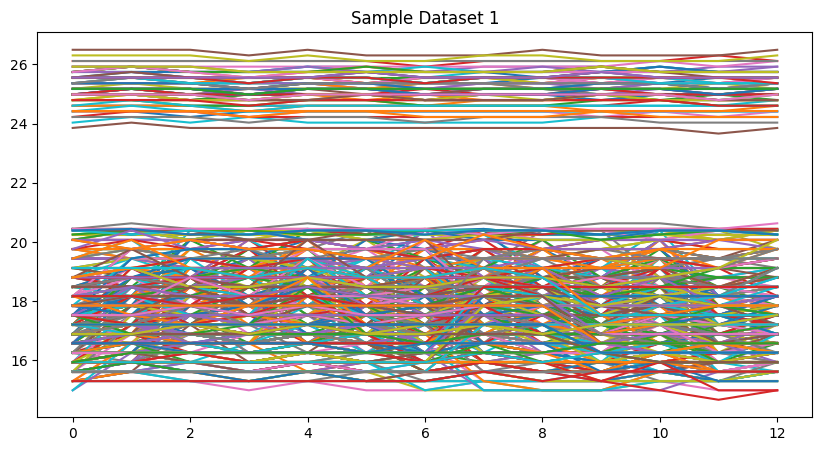

In [77]:
plt.figure(figsize=(25,5))
df.iloc[:,:-1].plot(legend=None, figsize=(10,5))
plt.title("Sample Dataset 1")
plt.show()

In [102]:
F = df.iloc[:,:-1].T.to_numpy()
inc_shape1 = IncElasticDepth(F=F, p=0.9, k=1.5)
inc_shape1.getAmplitudeOutliers(F)
print(len(inc_shape1.labels))

959


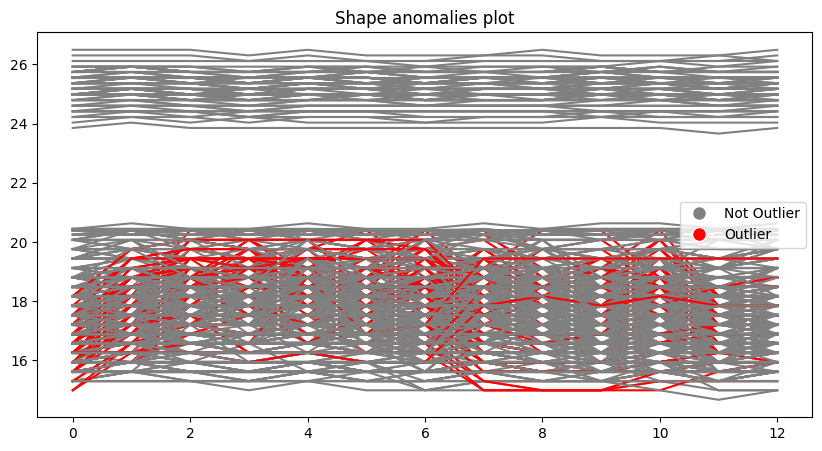

In [103]:
from matplotlib.colors import ListedColormap

colors = {'not outlier': 'gray', 'outlier': 'red'}
cmap = ListedColormap([colors[label] for label in inc_shape1.labels])

legend_handles = [
    plt.Line2D([0], [0], marker='o', color='w', label='Not Outlier', markerfacecolor='gray', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='Outlier', markerfacecolor='red', markersize=10)
]
df.iloc[:, :-1].plot(colormap=cmap, figsize=(10, 5))
plt.title("Shape anomalies plot")
plt.legend(handles=legend_handles)

In [104]:
print(df.iloc[:,:-1].shape)
print(df.iloc[:,959]) # next inc
F_inc = df.iloc[:,:-1].T.to_numpy()
inc_shape1.getAmplitudeOutliers(F_inc)
len(inc_shape1.labels)

(13, 959)
0     24.60
1     24.60
2     24.60
3     24.41
4     24.60
5     24.60
6     24.41
7     24.60
8     24.41
9     24.60
10    24.60
11    24.41
12    24.41
Name: C_959, dtype: float64


1918

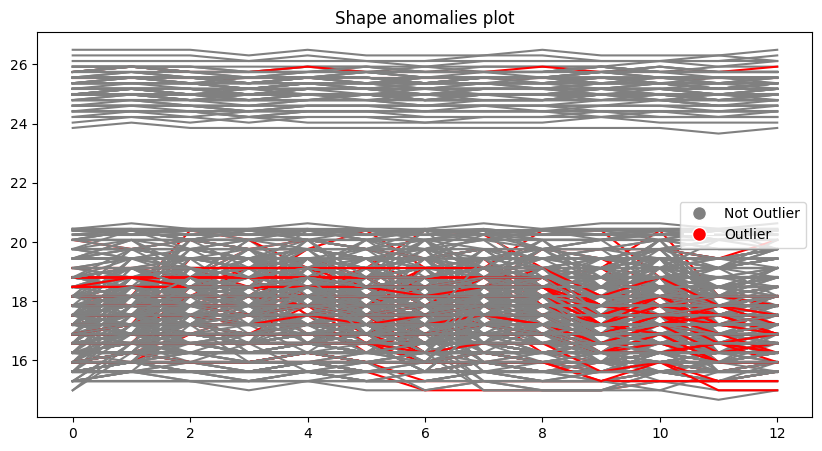

In [100]:
cmap = ListedColormap([colors[label] for label in inc_shape1.labels])
df.plot(colormap=cmap, figsize=(10, 5))
plt.title("Shape anomalies plot")
plt.legend(handles=legend_handles)